### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



### Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\projects\student_info.csv")

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.shape

(200, 2)

In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


### Visualize the Data 

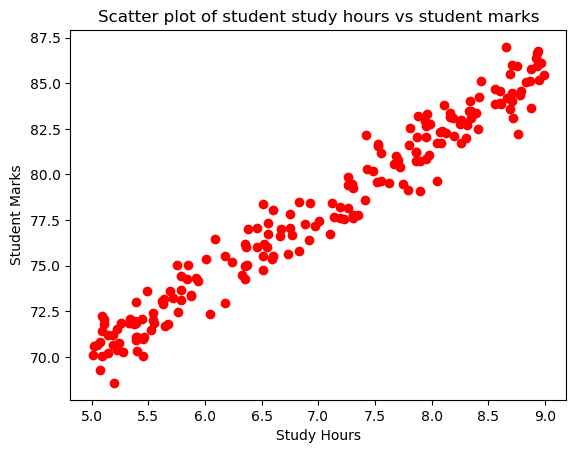

In [7]:
plt.scatter(x=df.study_hours,y=df.student_marks,color='red')
plt.title('Scatter plot of student study hours vs student marks' )
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.show()

### Check missing values

In [8]:
df.isna().any()

study_hours       True
student_marks    False
dtype: bool

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

#### Insight
There are 5 missing values in study_hours in dataset.

In [10]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
df2 = df.fillna(df.mean())

In [12]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [13]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

#### Insight 
 Now there is no missing values present in dataset.

### Split the dataset(Dependant and Independant)

In [14]:
x=df2.drop('student_marks',axis=1)
y=df2.drop('study_hours',axis=1)
print('Shape of x =', x.shape)
print('shape of y =',y.shape)

Shape of x = (200, 1)
shape of y = (200, 1)


#### Split the dataset into train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print('Shape of X_train =',X_train.shape)
print('Shape of X_test =',X_test.shape)
print('Shape of y_train =',y_train.shape)
print('Shape of y_test =',y_test.shape)

Shape of X_train = (160, 1)
Shape of X_test = (40, 1)
Shape of y_train = (160, 1)
Shape of y_test = (40, 1)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    #'XGBoost' : XGBRegressor()
    
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    
    
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [19]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='plasma_r',subset=['R2-score'])

,MAE,MSE,R2-score
Linear Regression,0.857000,1.044000,0.952000
Support Vector Machines,0.865000,1.161000,0.947000
Random Forest,1.063000,1.797000,0.918000
Decision Tree,1.241000,2.452000,0.888000
K-nearest Neighbors,1.305000,2.584000,0.882000


### Insight
 From above result table we can see that Linear Regression model shows best performance on our dataset. 

### Lets train the model and checking predection

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred  = lr.predict(X_test)
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

In [23]:
lr.coef_

array([[3.93037294]])

In [24]:
lr.intercept_

array([50.45063632])

### Lets check model prediction

In [25]:
lr.predict([[4]])[0][0].round(2)

66.17

In [26]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


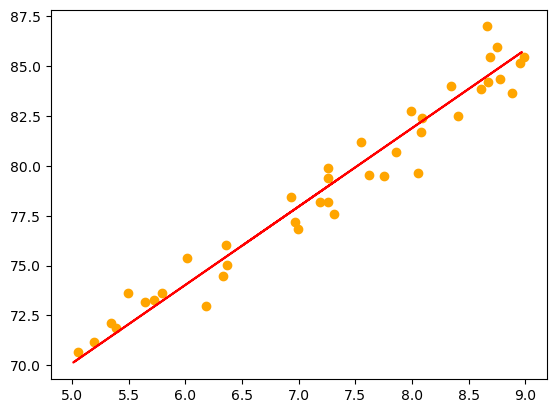

In [27]:
plt.scatter(X_test, y_test,color='orange')
plt.plot(X_train, lr.predict(X_train), color = "r")

### Save ML model

In [28]:
import joblib
import os
joblib.dump(lr, "student_mark_predictor123.pkl")

['student_mark_predictor123.pkl']

In [29]:
# Load the saved model from the file
loaded_model = joblib.load("student_mark_predictor123.pkl")


In [30]:
loaded_model.predict([[9]])[0][0]

85.82399274339224

### Now we Deploy the model

In [31]:
import numpy as np
import pandas as pd
from flask import Flask,render_template,request
import joblib
app=Flask(__name__)
model=joblib.load(r"C:\Users\hp\Downloads\Student Mark Predictor Project Deployment\Student mark Predictor Deployment\student_mark_predictor123.pkl")


df = pd.DataFrame()

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    global df
    
    input_features = [int(x) for x in request.form.values()]
    features_value = np.array(input_features)
    
    #validate input hours
    if input_features[0] <0 or input_features[0] >24:
        return render_template('index.html', prediction_text='Please enter valid hours between 1 to 24 if you live on the Earth')
        

    output = model.predict([features_value])[0][0].round(2)

    # input and predicted value store in df then save in csv file
    df= pd.concat([df,pd.DataFrame({'Study Hours':input_features,'Predicted Output':[output]})],ignore_index=True)
    print(df)   
    df.to_csv('smp_data_from_app.csv')

    return render_template('index.html', prediction_text='You will get [{}%] marks, when you do study [{}] hours per day '.format(output, int(features_value[0])))



if __name__ == "__main__":
    app.run(host='127.0.0.1', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [04/May/2024 19:44:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2024 19:44:43] "GET /static/images/1.jpg HTTP/1.1" 304 -
127.0.0.1 - - [04/May/2024 19:44:43] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/May/2024 19:44:46] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2024 19:44:46] "GET /static/images/1.jpg HTTP/1.1" 304 -


   Study Hours  Predicted Output
0            5              70.1


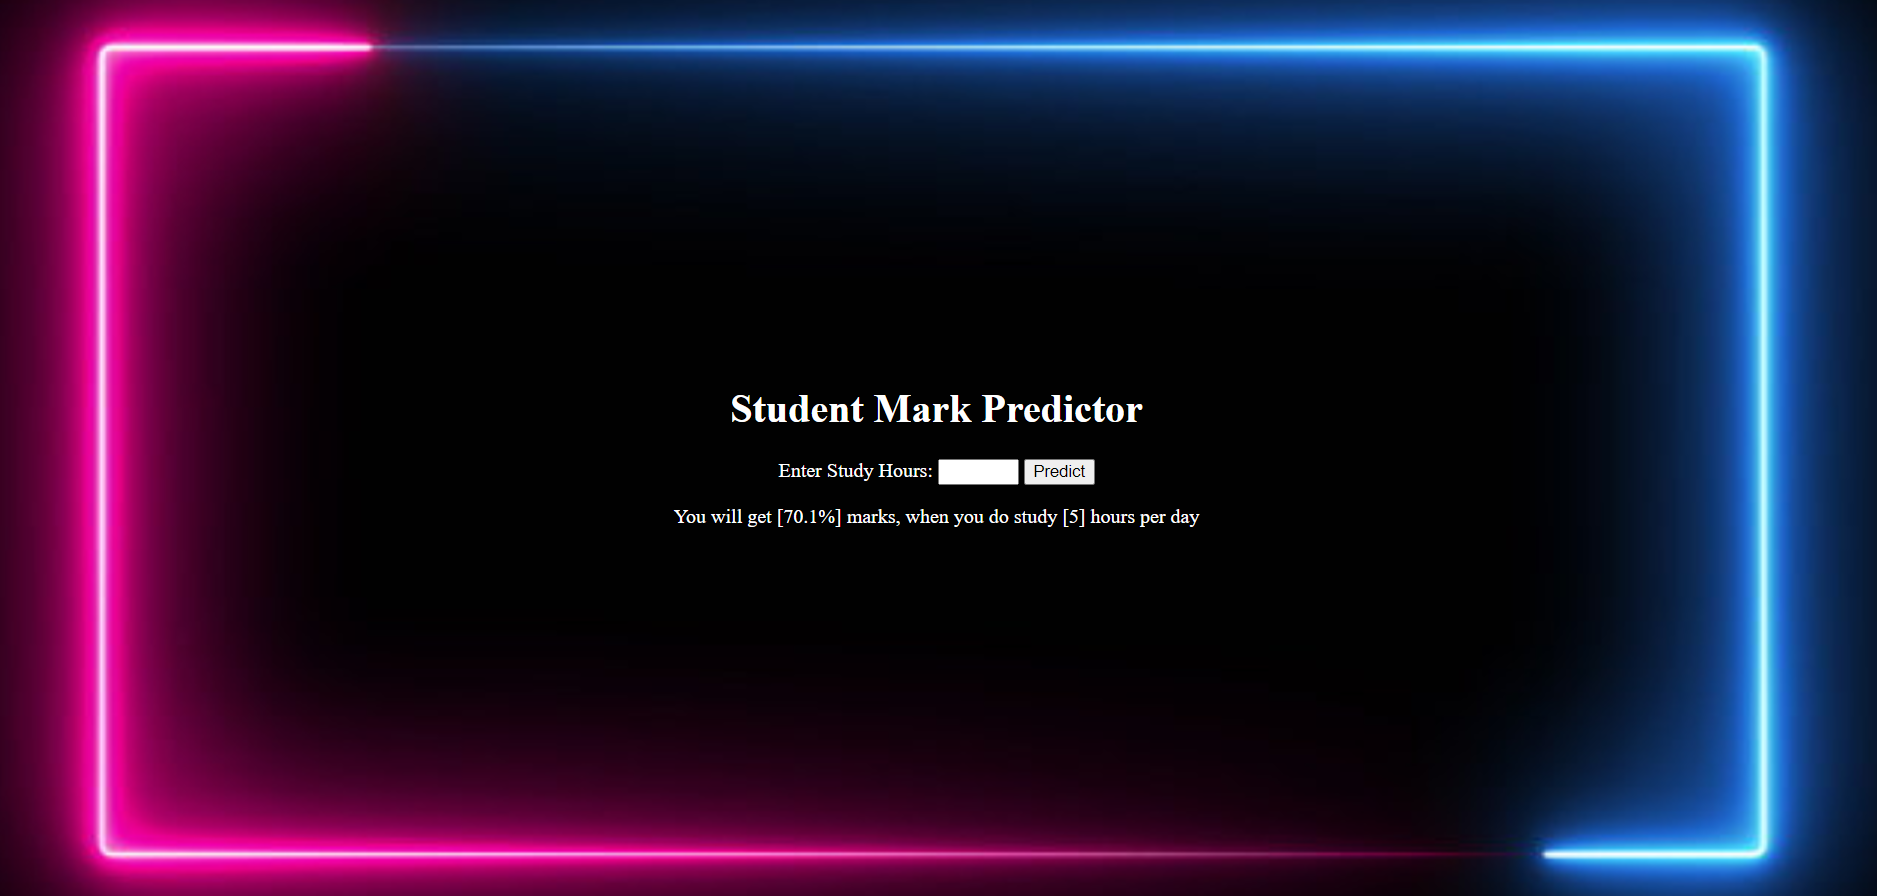

In [32]:
from IPython.display import Image

# Specify the path to the image file
image_path = r"C:\Users\hp\OneDrive\Pictures\Screenshots\Screenshot 2024-05-04 194505.png"

# Display the image
Image(filename=image_path)


### Insight
We deploy our model on web application  local host and our model  predicting student marks on student study hours.

### Conclusion
•Throughout this project, I gained valuable experience in conducting Exploratory Data Analysis (EDA) using Pandas and various data visualization libraries.

•I utilized libraries like Matplotlib, Plotly, and Seaborn to gain deeper insights into the dataset, visualizing trends, patterns, and relationships.

•The importance of data preprocessing became evident as it allowed us to handle missing values and data irregularities effectively. Additionally, I learned how to create new features, enhancing the predictive power of the models.

•Analysis of the dataset provided insights into which machine learning model would perform best, considering factors such as low residual and RMSE scores.

•The project emphasized the importance of a structured approach to model selection and evaluation. It highlighted the significance of starting with a suitable model and progressively refining it for improved accuracy.

•The deployment phase of the project was a valuable learning experience. Deploying the predictive model through a web interface using Flask allowed users to make predictions conveniently.

•This project has equipped me with valuable skills and knowledge in data analysis, feature engineering, model selection, and evaluation. It emphasized the importance of a structured approach to data science projects, including model deployment, and the value of selecting and optimizing models based on their performance and suitability for the task at hand. These learnings will undoubtedly benefit me in future data science endeavors, both in analysis and deployment scenarios.





